The first important thing to do is to check if this notebook works for you. \
A variety of resources are available for reading a jupyter notebook. (Google Colab, Jupyter, Visual Studio Code + Extensions). \
See whether you can run this first block and import the necessary modules. Don't worry about the commented out ROOT requirement, we don't need to worry about that.

In [1]:
# importing element tree
# under the alias of ET
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
from matplotlib import pyplot as plt
#import ROOT as root
from array import array


Now that we have recorded real data, let's get a handle on processing waveforms to derive the jitter in these LGADs.

In [2]:
# Define a function to readout data from xml file, and return said data as a time list, voltage list, and event number.
def data_readout(file):
    time_list = []
    volt_list = []
    event_list = []
    # Passing the path of the
    # xml document to enable the
    # parsing process
    xmlfile = ET.parse(file)

    # getting the parent tag of
    # the xml document
    parsedxml = xmlfile.getroot()
    counteve=0
    for child in parsedxml:
        counteve=counteve+1
        t_evt=[]
        v_evt=[]
        counter=0
        for child in child[4][2]:
            data_string=child.text
            split_data = data_string.split(',')
            t_step = float(split_data[0])
            v_step = float(split_data[1])
            t_evt.append(t_step)
            v_evt.append(v_step)
            counter=counter+1
            #print(counter, t_step, v_step)
        time_list.append(t_evt)
        volt_list.append(v_evt)
        event_list.append(counteve-1)
    print("end")
    return time_list, volt_list, event_list

In [3]:
# Extract data from our target xml file
time_list, volt_list, event_list = data_readout("NAME OF FILE HERE")

# Let's print out what the extracted data looks like.
time = np.array(time_list)
volt = np.array(volt_list) #voltage sign flipped to ensure waveform peak is positive.
event = np.array(event_list)
print(time) # in ns
print(volt) # in mV
#print(event_list)

end
[[ -1.088  -0.892  -0.697 ... 198.326 198.522 198.717]
 [ -1.593  -1.397  -1.202 ... 197.821 198.017 198.212]
 [ -1.474  -1.279  -1.084 ... 197.94  198.135 198.33 ]
 ...
 [ -1.626  -1.431  -1.236 ... 197.788 197.983 198.178]
 [ -1.247  -1.052  -0.857 ... 198.167 198.362 198.557]
 [ -1.373  -1.177  -0.982 ... 198.041 198.237 198.432]]
[[-14.5 -12.8 -11.1 ...  -7.8  -9.8 -13.3]
 [ -9.1  -8.1  -7.1 ...  -9.7  -8.7  -6.2]
 [  0.2  -1.4  -3.  ... -10.5  -9.1  -7.7]
 ...
 [ -9.6  -9.1  -8.6 ... -24.2 -22.2 -20.8]
 [ -5.6  -4.6  -3.6 ...  -4.9  -4.8  -4.3]
 [ -4.9  -5.1  -5.3 ...  -5.7  -4.   -3.3]]


With this data in hand, let's visualize some of it.\
Plot at least one of the waveforms (time vs voltage) to check that we're getting some non-negligible signal, and a general idea of what the average pmax and tmax (time of pmax) will be.\
Would also be helpful to plot all waveforms on top of one another.\
\
Shown below is a toy example of what pulses (zoomed in) should look like, showing the different attributes we will dive into and use throughout the lab.

![image](toy_example.png)

10000
1024
885


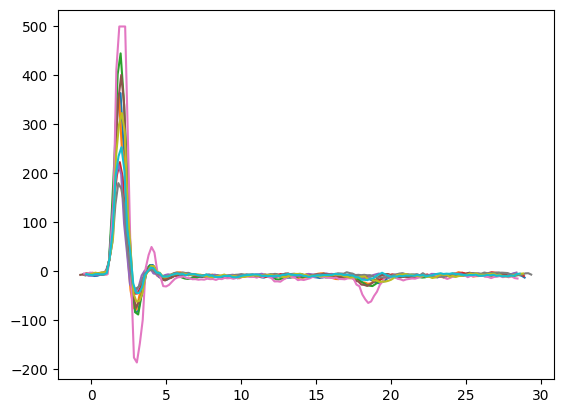

Next, save the tmax (time of pmax) and pmax of each event into a list we can access later.

Plotting out the distributions of pmax and tmax could give us a rough idea of what our data looks like from a macroscopic lens. Helps in case something went wrong for some events.\
Is the pmax distribution uniform in voltage, or not? If not, at what voltages does the distribution peak at?

Finally, plot all waveforms in one plot to double check if the pmax and tmax distributions make sense, if you have not already done so.

Now, we can calculate jitter for this dataset. There are a few ways to do it, and its execution is an exercise left to the reader.\
If you want a reccomended way of doing it, calculate jitter from the slew rate and RMS noise for each waveform, then take the average jitter across events (The last term in the equation below).\
\
\
Rise Time = time between 10% of pmax to 90% of pmax in the rising side of the waveform \
SNR = Signal to Noise Ratio = Amplitude of Signal divided by Amplitude of Noise (RMS) \
Slew Rate = Voltage over time from 10% of pmax to 90% of pmax

$$ Jitter = {Rise Time \over SNR} = {RMS_{Noise} \over Slew Rate} $$

As a sanity check, after calculating the 90% and 10% of pmax voltage values and time values, make a distribution of the times associated with 90% and 10%. \
Are they both happening before tmax?

Once that sanity check is cleared, you should be able to calculate jitter without issue. \
As a sanity check of the jitter, it should be at least less than 30 ps. (The units of time are in ns).

From here on, your team is free to explore more attributes and trends that could be derived from this data. Please decide on a group at least one trend to explore. \
If the PIN diode was also used, it should be possible to calculate the trend of LGAD gain as a function of voltage, and then from there how jitter changes as a function of gain on the LGAD.

Here is a list of possible things to explore:
- Does jitter vary with LGAD bias voltage?
- Does jitter vary with pulse height? Is jitter linear with pulse height?
- Does jitter vary with an attenuator attached? Does jitter scale with how the attenuator scales down pmax?
- Does varying the trigger threshold affect jitter? How about pmax?
- What is the minimum bias voltage needed to reliably recieve pulses?